In [10]:
class COVID_XGBOOST:
    """
    Covid simulation class
    """
    def __init__(self, path: str) -> None:
        import pandas as pd
        import os
        self.path = path
        if os.path.exists(path):
            self.data = pd.read_csv(path)
            self.data['time_value'] = pd.to_datetime(self.data['time_value'], format='%Y-%m-%d')

            self.data = self.data.set_index("time_value")
            self.data = self.data.asfreq("D")
            self.data = self.data.sort_index()
            self.data_train = None
            self.data_validation = None
            self.data_test = None

        else:
            assert False, "The path does not exist"
    def split_data(self, train_end):
        """
        Split the data into train and test
        """
        import pandas as pd
        import numpy as np
        import os
        import datetime
        import calendar
        import matplotlib.pyplot as plt
        self.data_train = self.data.loc[:train_end,:]
        self.data_test = self.data.loc[train_end:,:]
        return
    def plot_data(self, train_end):
        """
        Plot the data
        """
        import matplotlib.pyplot as plt
        import numpy as np
        import pandas as pd
        import datetime
        import calendar
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        import plotly.express as px


        self.data.loc[:train_end, 'partition'] = 'train'
        self.data.loc[train_end:, 'partition'] = 'test'
        fig = px.line(
            data_frame = self.data.reset_index(),
            x      = 'time_value',
            y      = 'value',
            color  = 'partition',
            title  = 'Number of covid cases',
            width  = 900,
            height = 500
        )
        fig.update_xaxes(
            rangeslider_visible=True,
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            )
        )
        fig.show()
        self.data  = self.data.drop(columns=['partition'])
    def XGBoost_Model(self):
        from skforecast.ForecasterAutoreg import ForecasterAutoreg
        from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
        from skforecast.model_selection import grid_search_forecaster
        from skforecast.model_selection import backtesting_forecaster
        from xgboost import XGBRegressor
        from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
        from sklearn.linear_model import Ridge
        forecaster = ForecasterAutoregMultiOutput(
                    regressor = Ridge(),
                    steps     = steps,
                    lags      = 15
                )

        forecaster.fit(y=self.data_train['value'])

        
        # metric, predictions = backtesting_forecaster(
        #     forecaster = forecaster,
        #     y          = self.data['value'],
        #     initial_train_size = len(self.data_train),
        #     fixed_train_size   = False,
        #     steps      = 7,
        #     refit      = False,
        #     metric     = 'mean_squared_error',
        #     verbose    = False # Change to True to see detailed information
        # )
        # print(f"Backtest error: {metric}")
        # predictions['true'] = self.data['value']


        # # Plot predictions
        # # ==============================================================================
        # # plot the predictions
        # fig, ax = plt.subplots(figsize=(12, 4))
        # predictions.plot(ax=ax, label='predictions')
        # predictions['true'].plot(ax=ax)
        # predictions['pred'].plot(ax=ax)
        # ax.set_title('value')
        # ax.legend()

        return forecaster
    def XGBoost_Predict(self, forecaster,days):
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        import plotly.express as px
        return forecaster.predict(days)


        


In [90]:
class COVID_XGBOOST:
    """
    Covid simulation class
    """
    def __init__(self, path: str) -> None:
        import pandas as pd
        import os
        self.path = path
        if os.path.exists(path):
            self.data = pd.read_csv(path)
            self.data['time_value'] = pd.to_datetime(self.data['time_value'], format='%Y-%m-%d')

            self.data = self.data.set_index("time_value")
            self.data = self.data.asfreq("D")
            self.data = self.data.sort_index()
            self.data_train = None
            self.data_validation = None
            self.data_test = None

        else:
            assert False, "The path does not exist"
    def split_data(self, steps):
        """
        Split the data into train and test
        """
        import pandas as pd
        import numpy as np
        import os
        import datetime
        import calendar
        import matplotlib.pyplot as plt
        self.data_train = self.data[:-steps]
        self.data_test = self.data[-steps:]
        return
    def plot_data(self, steps):
        """
        Plot the data
        """
        import matplotlib.pyplot as plt
        import numpy as np
        import pandas as pd
        import datetime
        import calendar
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        import plotly.express as px

        self.data['partition'] = 'train'
        self.data[:-steps]['partition'] = 'train'
        self.data[-steps:]['partition'] = 'test'
        fig = px.line(
            data_frame = self.data.reset_index(),
            x      = 'time_value',
            y      = 'value',
            color  = 'partition',
            title  = 'Number of covid cases',
            width  = 900,
            height = 500
        )
        fig.update_xaxes(
            rangeslider_visible=True,
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            )
        )
        fig.show()
        self.data  = self.data.drop(columns=['partition'])
    def XGBoost_Model(self):
        from skforecast.ForecasterAutoreg import ForecasterAutoreg
        from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
        from skforecast.model_selection import grid_search_forecaster
        from skforecast.model_selection import backtesting_forecaster
        from xgboost import XGBRegressor
        from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
        from sklearn.linear_model import Ridge
        from catboost import CatBoostRegressor

        forecaster = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=0,silent=True),
                lags = 24
                )
        param_grid = {
            'n_estimators': [100, 500],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1]
        }
        lags_grid = [24, 48, 72, [1, 2, 3, 23, 24, 25, 71, 72, 73]]
        results_grid = grid_search_forecaster(
            forecaster         = forecaster,
            y                  = self.data['value'], # Train and validation data
            param_grid         = param_grid,
            lags_grid          = lags_grid,
            steps              = 36,
            refit              = False ,
            metric             = 'mean_squared_error',
            initial_train_size = int(len(self.data_train)), # Model is trained with trainign data
            fixed_train_size   = False,
            return_best        = True,
            verbose            = False
        )
        # forecaster = ForecasterAutoregMultiOutput(
        #             regressor = XGBRegressor(),
        #             steps     = 36,
        #             lags      = 15
        #         )

        # forecaster.fit(y=self.data_train['value'])

        
        # metric, predictions = backtesting_forecaster(
        #     forecaster = forecaster,
        #     y          = self.data['value'],
        #     initial_train_size = len(self.data_train),
        #     fixed_train_size   = False,
        #     steps      = 7,
        #     refit      = False,
        #     metric     = 'mean_squared_error',
        #     verbose    = False # Change to True to see detailed information
        # )
        # print(f"Backtest error: {metric}")
        # predictions['true'] = self.data['value']


        # # Plot predictions
        # # ==============================================================================
        # # plot the predictions
        # fig, ax = plt.subplots(figsize=(12, 4))
        # predictions.plot(ax=ax, label='predictions')
        # predictions['true'].plot(ax=ax)
        # predictions['pred'].plot(ax=ax)
        # ax.set_title('value')
        # ax.legend()

        return forecaster
    def XGBoost_Predict(self, forecaster,days):
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        import plotly.express as px
        return forecaster.predict(days)


        


In [91]:
import datetime
covid_xgboost = COVID_XGBOOST(path='covid_pa_confirmed_data_7d.csv')

covid_xgboost.split_data(steps=90)
covid_xgboost.plot_data(steps=90)
forcaster = covid_xgboost.XGBoost_Model()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loop lags_grid:   0%|                                               | 0/4 [00:00<?, ?it/s]

Number of models compared: 48
[16:03:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




loop lags_grid:  25%|█████████▊                             | 1/4 [00:08<00:26,  8.94s/it]

[16:03:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:03:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




loop lags_grid:  50%|███████████████████▌                   | 2/4 [00:21<00:22, 11.16s/it]

[16:04:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[16:04:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




loop lags_grid:  50%|███████████████████▌                   | 2/4 [00:36<00:36, 18.22s/it]


KeyboardInterrupt: 

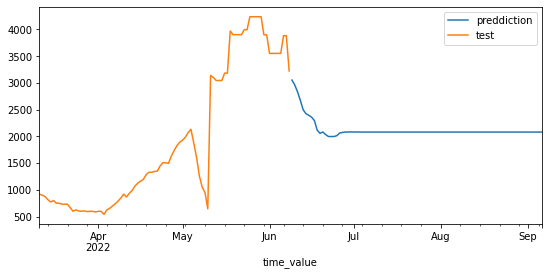

In [87]:
from matplotlib import pyplot as plt
fig, ax=plt.subplots(figsize=(9, 4))
forcaster.predict(90).plot(ax=ax, label='preddiction')
covid_xgboost.data_test['value'].plot(ax=ax, label='test')
ax.legend()

# plt.plot(forcaster.predict(14), label='predictions')
# plt.plot(covid_xgboost.data_test['value'], label='true')


In [68]:
from typing import Union, Tuple, Optional
import numpy as np
import pandas as pd
import logging
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.statespace.sarimax import SARIMAX
def _get_metric(metric:str) -> callable:
    from sklearn.metrics import mean_squared_error 
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import mean_squared_log_error
    '''
    Get the corresponding scikitlearn function to calculate the metric.
    
    Parameters
    ----------
    metric : {'mean_squared_error', 'mean_absolute_error', 
              'mean_absolute_percentage_error', 'mean_squared_log_error'}
        Metric used to quantify the goodness of fit of the model.
    
    Returns 
    -------
    metric : callable
        scikitlearn function to calculate the desired metric.
    '''
    
    if metric not in ['mean_squared_error', 'mean_absolute_error',
                      'mean_absolute_percentage_error', 'mean_squared_log_error']:
        raise Exception(
            f"Allowed metrics are: 'mean_squared_error', 'mean_absolute_error', "
            f"'mean_absolute_percentage_error' and 'mean_squared_log_error'. Got {metric}."
        )
    
    metrics = {
        'mean_squared_error': mean_squared_error,
        'mean_absolute_error': mean_absolute_error,
        'mean_absolute_percentage_error': mean_absolute_percentage_error,
        'mean_squared_log_error': mean_squared_log_error
    }
    
    metric = metrics[metric]
    
    return metric
def backtesting_sarimax(
        y: pd.Series,
        steps: int,
        metric: Union[str, callable],
        initial_train_size: int,
        fixed_train_size: bool=False,
        refit: bool=False,
        order: tuple=(1, 0, 0), 
        seasonal_order: tuple=(0, 0, 0, 0),
        trend: str=None,
        alpha: float= 0.05,
        exog: Optional[Union[pd.Series, pd.DataFrame]]=None,
        sarimax_kwargs: dict={},
        fit_kwargs: dict={'disp':0},
        verbose: bool=False
) -> Tuple[float, pd.DataFrame]:
    '''

    Backtesting (validation) of `SARIMAX` model from statsmodels >= 0.12. The model
    is trained using the `initial_train_size` first observations, then, in each
    iteration, a number of `steps` predictions are evaluated. If refit is `True`,
    the model is re-fitted in each iteration before making predictions.

    https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html

    Parameters
    ----------
    y : pandas Series
        Time series values. 

    steps : int
        Number of steps to predict.

    metric : str, callable
        Metric used to quantify the goodness of fit of the model.

        If string:
            {'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'}

        It callable:
            Function with arguments y_true, y_pred that returns a float.

    initial_train_size: int 
        Number of samples used in the initial train.

    fixed_train_size: bool, default `False`
        If True, train size doesn't increases but moves by `steps` in each iteration.

    refit: bool, default False
        Whether to re-fit the model in each iteration.

    order: tuple 
        The (p,d,q) order of the model for the number of AR parameters, differences,
        and MA parameters. d must be an integer indicating the integration order
        of the process, while p and q may either be an integers indicating the AR
        and MA orders (so that all lags up to those orders are included) or else
        iterables giving specific AR and / or MA lags to include. Default is an
        AR(1) model: (1,0,0).

    seasonal_order: tuple
        The (P,D,Q,s) order of the seasonal component of the model for the AR parameters,
        differences, MA parameters, and periodicity. D must be an integer
        indicating the integration order of the process, while P and Q may either
        be an integers indicating the AR and MA orders (so that all lags up to
        those orders are included) or else iterables giving specific AR and / or
        MA lags to include. s is an integer giving the periodicity (number of
        periods in season), often it is 4 for quarterly data or 12 for monthly data.
        Default is no seasonal effect.

    trend: str {'n', 'c', 't', 'ct'}
        Parameter controlling the deterministic trend polynomial A(t). Can be
        specified as a string where 'c' indicates a constant (i.e. a degree zero
        component of the trend polynomial), 't' indicates a linear trend with time,
        and 'ct' is both. Can also be specified as an iterable defining the non-zero
        polynomial exponents to include, in increasing order. For example, [1,1,0,1]
        denotes a+bt+ct3. Default is to not include a trend component.

    alpha: float, default 0.05
        The significance level for the confidence interval. The default
        alpha = .05 returns a 95% confidence interval.

    exog : pandas Series, pandas DataFrame, default `None`
        Exogenous variable/s included as predictor/s. Must have the same
        number of observations as `y` and should be aligned so that y[i] is
        regressed on exog[i].

    sarimax_kwargs: dict, default `{}`
        Additional keyword arguments passed to SARIMAX constructor. See more in
        https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX

    fit_kwargs: dict, default `{'disp':0}`
        Additional keyword arguments passed to SARIMAX fit. See more in
        https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.fit.html#statsmodels.tsa.statespace.sarimax.SARIMAX.fit

    verbose : bool, default `False`
        Print number of folds used for backtesting.

    Returns 
    -------
    metric_value: float
        Value of the metric.

    backtest_predictions: pandas DataFrame
        Values predicted and their estimated interval:
                column pred   = predictions.
                column lower  = lower bound of the interval.
                column upper  = upper bound interval of the interval.
    '''
    if isinstance(metric, str):
        metric = _get_metric(metric=metric)

    folds     = int(np.ceil((len(y) - initial_train_size) / steps))
    remainder = (len(y) - initial_train_size) % steps
    backtest_predictions = []

    if verbose:
        print(f"Number of observations used for training: {initial_train_size}")
        print(f"Number of observations used for backtesting: {len(y) - initial_train_size}")
        print(f"    Number of folds: {folds}")
        print(f"    Number of steps per fold: {steps}")
        if remainder != 0:
            print(f"    Last fold only includes {remainder} observations.")

    if folds > 50 and refit:
        print(
            f"Model will be fit {folds} times. This can take substantial amounts of time. "
            f"If not feasible, try with `refit = False`."
        )

    if refit:
        for i in range(folds):
            # In each iteration (except the last one) the model is fitted before making predictions.
            if fixed_train_size:
                # The train size doesn't increases but moves by `steps` in each iteration.
                train_idx_start = i * steps
                train_idx_end = initial_train_size + i * steps
            else:
                # The train size increases by `steps` in each iteration.
                train_idx_start = 0
                train_idx_end = initial_train_size + i * steps

            if exog is not None:
                next_window_exog = exog.iloc[train_idx_end:train_idx_end + steps, ]

            if i < folds - 1: # from the first step to one before the last one.
                if exog is None:
                    model = SARIMAX(
                                endog = y.iloc[train_idx_start:train_idx_end],
                                order = order,
                                seasonal_order = seasonal_order,
                                trend = trend,
                                **sarimax_kwargs
                            ).fit(**fit_kwargs)
                    pred = model.get_forecast(steps=steps)
                    pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )
                else:
                    model = SARIMAX(
                                endog = y.iloc[train_idx_start:train_idx_end],
                                exog  = exog.iloc[train_idx_start:train_idx_end, ],
                                order = order,
                                seasonal_order = seasonal_order,
                                trend = trend,
                                **sarimax_kwargs
                            ).fit(**fit_kwargs)
                    pred = model.get_forecast(steps=steps, exog=next_window_exog)
                    pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )
            else:    
                if remainder == 0:
                    if exog is None:
                        model = SARIMAX(
                                    endog = y.iloc[train_idx_start:train_idx_end],
                                    order = order,
                                    seasonal_order = seasonal_order,
                                    trend = trend,
                                    **sarimax_kwargs
                                ).fit(**fit_kwargs)
                        pred = model.get_forecast(steps=steps)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )
                    else:
                        model = SARIMAX(
                                    endog = y.iloc[train_idx_start:train_idx_end],
                                    exog  = exog.iloc[train_idx_start:train_idx_end, ],
                                    order = order,
                                    seasonal_order = seasonal_order,
                                    trend = trend,
                                    **sarimax_kwargs
                                ).fit(**fit_kwargs)
                        pred = model.get_forecast(steps=steps, exog=next_window_exog)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                              )   
                else:
                    # Only the remaining steps need to be predicted
                    steps = remainder
                    if exog is None:
                        model = SARIMAX(
                                    endog = y.iloc[train_idx_start:train_idx_end],
                                    order = order,
                                    seasonal_order = seasonal_order,
                                    trend = trend,
                                    **sarimax_kwargs
                                ).fit(**fit_kwargs)
                        pred = model.get_forecast(steps=steps)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                              )
                    else:
                        model = SARIMAX(
                                    endog = y.iloc[train_idx_start:train_idx_end],
                                    exog  = exog.iloc[train_idx_start:train_idx_end, ],
                                    order = order,
                                    seasonal_order = seasonal_order,
                                    trend = trend,
                                    **sarimax_kwargs
                                ).fit(**fit_kwargs)
                        pred = model.get_forecast(steps=steps, exog=next_window_exog)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                              )
            backtest_predictions.append(pred)
    else:
        # Since the model is only fitted with the initial_train_size, the model
        # must be extended in each iteration to include the data needed to make
        # predictions.
        if exog is None:
            model = SARIMAX(
                        endog = y.iloc[:initial_train_size],
                        order = order,
                        seasonal_order = seasonal_order,
                        trend = trend,
                        **sarimax_kwargs
                    ).fit(**fit_kwargs)
        else:
            model = SARIMAX(
                        endog = y.iloc[:initial_train_size],
                        exog  = exog.iloc[:initial_train_size],
                        order = order,
                        seasonal_order = seasonal_order,
                        trend = trend,
                        **sarimax_kwargs
                    ).fit(**fit_kwargs)

        for i in range(folds):
            last_window_end   = initial_train_size + i * steps
            last_window_start = (initial_train_size + i * steps) - steps 
            last_window_y     = y.iloc[last_window_start:last_window_end]
            if exog is not None:
                last_window_exog = exog.iloc[last_window_start:last_window_end]
                next_window_exog = exog.iloc[last_window_end:last_window_end + steps]

            if i == 0:
                # No extend is needed for the first fold
                if exog is None:
                    pred = model.get_forecast(steps=steps)
                    pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )     
                else:
                    pred = model.get_forecast(steps=steps, exog=next_window_exog)
                    pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )

            elif i < folds - 1:
                if exog is None:
                    model = model.extend(endog=last_window_y)
                    pred = model.get_forecast(steps=steps)
                    pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )
                else:
                    model = model.extend(endog=last_window_y, exog=last_window_exog)
                    pred = model.get_forecast(steps=steps, exog=next_window_exog)
                    pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                           )

            else:
                if remainder == 0:
                    if exog is None:
                        model = model.extend(endog=last_window_y)
                        pred = model.get_forecast(steps=steps)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                               )

                    else:
                        model = model.extend(endog=last_window_y, exog=last_window_exog)
                        pred = model.get_forecast(steps=steps, exog=next_window_exog)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                               )
                else:
                    # Only the remaining steps need to be predicted
                    steps = remainder
                    if exog is None:
                        model = model.extend(endog=last_window_y)
                        pred = model.get_forecast(steps=steps)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                               )

                    else:
                        model = model.extend(endog=last_window_y, exog=last_window_exog)
                        pred = model.get_forecast(steps=steps, exog=next_window_exog)
                        pred = pd.concat((
                                pred.predicted_mean.rename("predicted_mean"),
                                pred.conf_int(alpha=alpha)),
                                axis = 1
                               )
            backtest_predictions.append(pred)

    backtest_predictions = pd.concat(backtest_predictions)

    metric_value = metric(
                    y_true = y.iloc[initial_train_size: initial_train_size + len(backtest_predictions)],
                    y_pred = backtest_predictions['predicted_mean']
                  )

    return metric_value, backtest_predictions, model


In [73]:
class COVID_ARIMA(object):
    """
    Covid simulation class
    """
    def __init__(self, path: str) -> None:
        import pandas as pd
        import os
        self.path = path
        if os.path.exists(path):
            self.data = pd.read_csv(path)
            self.data['time_value'] = pd.to_datetime(self.data['time_value'], format='%Y-%m-%d')

            self.data = self.data.set_index("time_value")
            self.data = self.data.asfreq("D")
            self.data = self.data.sort_index()
            self.data_train = None
            self.data_validation = None
            self.data_test = None

        else:
            assert False, "The path does not exist"
    def split_data(self, steps):
        """
        Split the data into train and test
        """
        import pandas as pd
        import numpy as np
        import os
        import datetime
        import calendar
        import matplotlib.pyplot as plt
        self.data_train = self.data[:-steps]
        self.data_test = self.data[-steps:]
        return
    def plot_data(self, steps):
        """
        Plot the data
        """
        import matplotlib.pyplot as plt
        import numpy as np
        import pandas as pd
        import datetime
        import calendar
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        import plotly.express as px

        self.data['partition'] = 'train'
        self.data[:-steps]['partition'] = 'train'
        self.data[-steps:]['partition'] = 'test'
        fig = px.line(
            data_frame = self.data.reset_index(),
            x      = 'time_value',
            y      = 'value',
            color  = 'partition',
            title  = 'Number of covid cases',
            width  = 900,
            height = 500
        )
        fig.update_xaxes(
            rangeslider_visible=True,
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            )
        )
        fig.show()
        self.data  = self.data.drop(columns=['partition'])
    def ARIMA_Model(self):
        # from skforecast.model_selection_statsmodels import backtesting_sarimax
        metric, predictions_backtest,model = backtesting_sarimax(
                                    y = self.data['value'],
                                    order = (12, 1, 1),
                                    seasonal_order = (0, 0, 0, 0),
                                    initial_train_size = len(self.data_train),
                                    fixed_train_size = False,
                                    steps = 7,
                                    metric = 'mean_absolute_error',
                                    refit = False,
                                    verbose = True,
                                    fit_kwargs = {'maxiter': 250, 'disp': 0},
                               )
        print(f"Error backtest: {metric}")

        return predictions_backtest, model
    def ARIMA_Predict(self, forecaster,days):
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        import plotly.express as px
        return forecaster.predict(days)


        
import datetime
covid_arima = COVID_ARIMA(path='covid_pa_confirmed_data_7d.csv')

covid_arima.split_data(steps=180)
covid_arima.plot_data(steps=180)
predictions_backtest,model = covid_arima.ARIMA_Model()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of observations used for training: 660
Number of observations used for backtesting: 180
    Number of folds: 26
    Number of steps per fold: 7
    Last fold only includes 5 observations.
Error backtest: 818.6587045651372


,predicted_mean,lower value,upper value
2022-06-04,3547.808173,3360.466729,3735.149617
2022-06-05,3525.966755,3192.628548,3859.304962
2022-06-06,3626.708703,3135.114081,4118.303326
2022-06-07,3521.874195,2856.066898,4187.681492
2022-06-08,3590.885731,2758.580633,4423.190829
2022-06-09,3470.857565,2483.514349,4458.200781
2022-06-10,3420.826293,2278.209074,4563.443511
2022-06-11,3408.598527,2145.194641,4672.002413
2022-06-12,3379.987163,1991.420862,4768.553464
2022-06-13,3391.651140,1879.101658,4904.200623


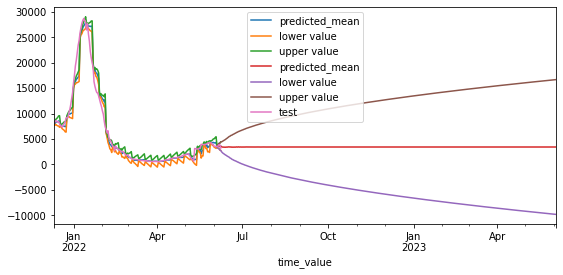

In [84]:
from matplotlib import pyplot as plt

pred = model.get_forecast(steps=365)
pred = pd.concat((
            pred.predicted_mean.rename("predicted_mean"),
            pred.conf_int(alpha=0.05)),
            axis = 1
    ) 

fig, ax=plt.subplots(figsize=(9, 4))
predictions_backtest.plot(ax=ax, label='backtest')
pred.plot(ax=ax, label='predicted')
covid_arima.data_test['value'].plot(ax=ax, label='test')
ax.legend()

# plt.plot(forcaster.predict(14), label='predictions')
# plt.plot(covid_xgboost.data_test['value'], label='true')
